In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing

ImportError: No module named tensorflow

In [3]:
DATADIR = "/Users/linusmohr/Desktop/MasterThesis/CSData/"
UK = "UK/input.txt"

In [4]:
datapath = os.path.join(DATADIR , UK)
print (datapath)
descrpath = os.path.join(DATADIR, "UK/explanation.csv")

/Users/linusmohr/Desktop/MasterThesis/CSData/UK/input.txt


In [6]:

descr = pd.read_csv(descrpath)
print(descr)

data = pd.read_csv(datapath, header = None, skipinitialspace = True, sep = " ", names = descr['Name'])


    Nr      Name         Type
0    1    Censor          0/1
1    2   Censore          0/1
2    3      Open   Continuous
3    4       Age   Continuous
4    5    Amount   Continuous
5    6   Curradd   Continuous
6    7   Curremp   Continuous
7    8  Custgend  Categorical
8    9  Depchild   Continuous
9   10  Freqpaid  Categorical
10  11  Homephon  Categorical
11  12   Insprem   Continuous
12  13  Loantype  Categorical
13  14   Marstat  Categorical
14  15      Term   Continuous
15  16  Homeowns  Categorical
16  17   Purpose  Categorical


In [8]:
data.head()

,Censor,Censore,Open,Age,Amount,Curradd,Curremp,Custgend,Depchild,Freqpaid,Homephon,Insprem,Loantype,Marstat,Term,Homeowns,Purpose
0,0.0,1.0,11.0,20.0,3000.0,0.3,0.5,2.0,0.0,1.0,1.0,410.0,1.0,1.0,36.0,2.0,17.0
1,0.0,0.0,19.0,27.0,4000.0,1.5,7.2,2.0,0.0,3.0,1.0,0.0,2.0,2.0,36.0,2.0,7.0
2,0.0,0.0,11.0,32.0,500.0,4.0,32.5,1.0,0.0,1.0,1.0,45.0,1.0,3.0,12.0,2.0,21.0
3,0.0,1.0,10.0,19.0,1000.0,19.7,1.9,2.0,0.0,1.0,1.0,90.0,1.0,1.0,12.0,2.0,17.0
4,0.0,0.0,12.0,34.0,1200.0,2.8,4.3,1.0,1.0,3.0,1.0,0.0,1.0,2.0,12.0,1.0,26.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa44850490>,
      dtype=object)

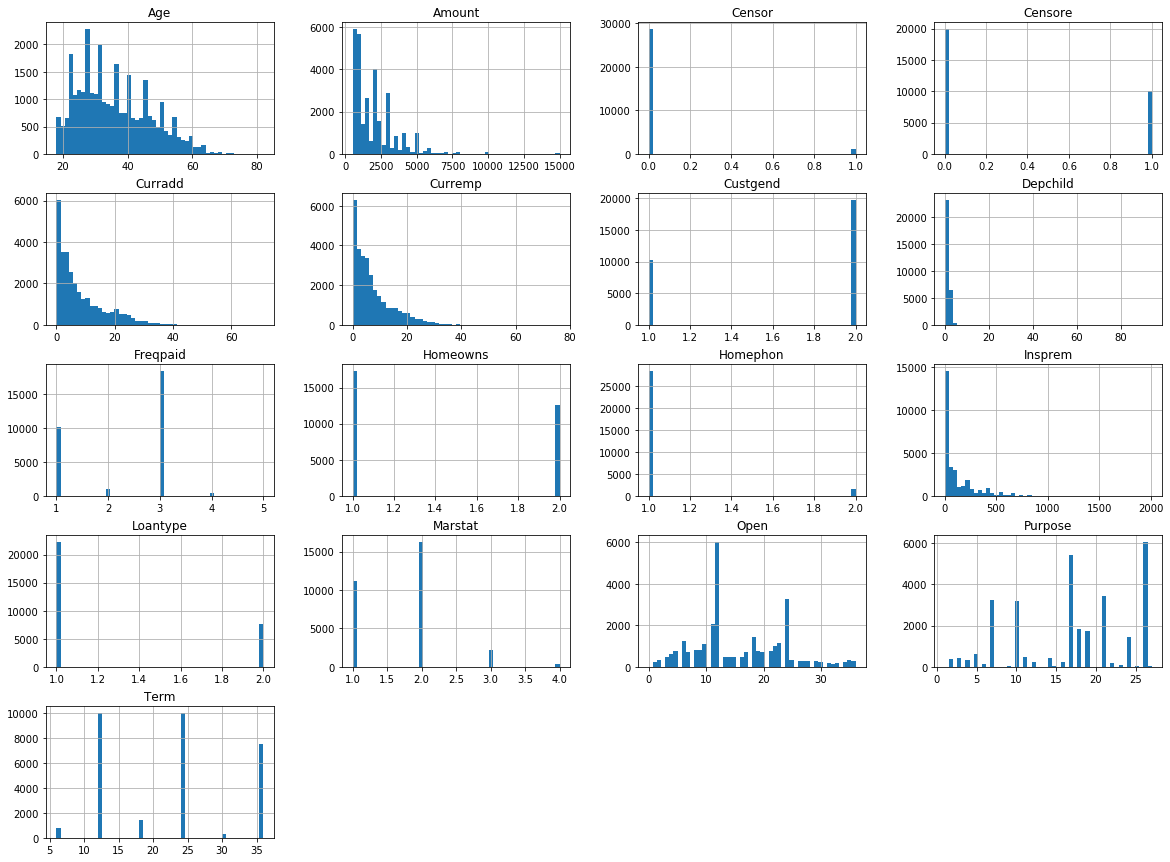

In [9]:
%matplotlib inline
data.hist(bins = 50, figsize =(20,15))

In [10]:
corr_matrix = data.corr()
corr_matrix["Censor"].sort_values(ascending=False)

Censor      1.000000
Insprem     0.085074
Homeowns    0.055573
Purpose     0.053157
Term        0.050892
Amount      0.021433
Homephon    0.016299
Custgend    0.014178
Depchild    0.002606
Loantype   -0.021442
Marstat    -0.023346
Freqpaid   -0.042358
Curradd    -0.044617
Age        -0.064684
Curremp    -0.089468
Open       -0.113929
Censore    -0.144338
Name: Censor, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size =0.2)

In [16]:
csdata= train_set.drop("Censor", axis =1)
cs_labels = train_set["Censor"].copy()
cs_cat = csdata[["Custgend","Freqpaid","Homephon","Loantype","Marstat","Homeowns","Purpose","Censore"]]
cs_numerical = csdata.drop(columns =cs_cat)
cs_numerical.head()


,Open,Age,Amount,Curradd,Curremp,Depchild,Insprem,Term
16880,4.0,29.0,1000.0,4.8,3.3,0.0,88.0,12.0
8142,12.0,27.0,1000.0,15.4,10.4,0.0,0.0,12.0
19551,4.0,24.0,1500.0,0.3,1.4,0.0,0.0,18.0
13130,24.0,25.0,1000.0,23.7,1.3,0.0,115.0,24.0
13021,9.0,30.0,2000.0,1.1,7.0,0.0,0.0,24.0


In [43]:
cs_test_data = test_set.drop("Censor", axis =1)
cs_test_labels = test_set["Censor"].copy()
cs_test_cat = cs_test_data[["Custgend","Freqpaid","Homephon","Loantype","Marstat","Homeowns","Purpose","Censore"]]
cs_numerical = cs_test_data.drop(columns =cs_test_cat)

In [17]:
csdata.isnull().values.any() #no missing values

False

In [21]:
#numerical pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('mm_scaler', MinMaxScaler()),
])





In [33]:
#full pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(cs_numerical)
cat_attribs = list(cs_cat)

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(categories='auto'), cat_attribs),
         ])
cs_prepared = full_pipeline.fit_transform(csdata)

In [44]:
cs_test_prepared = full_pipeline.fit_transform(cs_test_data)

In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

y = cs_labels.astype(np.int)
X= cs_prepared

log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X,y)
log_reg.predict(X)
log_reg.predict_proba(X)
log_reg.score(X,y)

/Users/linusmohr/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9635416666666666

In [47]:
yt = cs_test_labels.astype(np.int)
Xt = cs_test_prepared

log_reg.score(Xt,yt)

0.9635

In [65]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators = 10, learning_rate=1)
gbrt.fit(X, y)
gbrt.score(X,y)



0.3390264491553153